<a href="https://colab.research.google.com/github/mariahjackson91/sales-predictions/blob/main/SalesPredictions_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ****IMPORTS****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')
from sklearn.pipeline import make_pipeline
filename = '/content/drive/MyDrive/Coding Dojo- Data Science/01 Week 1: Python/sales_predictions.csv'

In [2]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# DATA CLEANING

In [4]:
# duplicates
df.duplicated().any()

False

In [5]:
# missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.drop(columns= ['Item_Weight', 'Outlet_Size'], inplace= True)

In [7]:
# check to ensure there are no missing values
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
# check to ensure there are no missing values
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
# check to ensure there are no missing values
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
# check to ensure there are no missing values
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
# check for data inconsistancies
for col in df:
  if df[col].dtype == 'object':
    print(col)
    print(df[col].unique())
    print()

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']

Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [12]:
# fix inconsistancies with fat content
df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular' }, inplace=True)

# Analysis

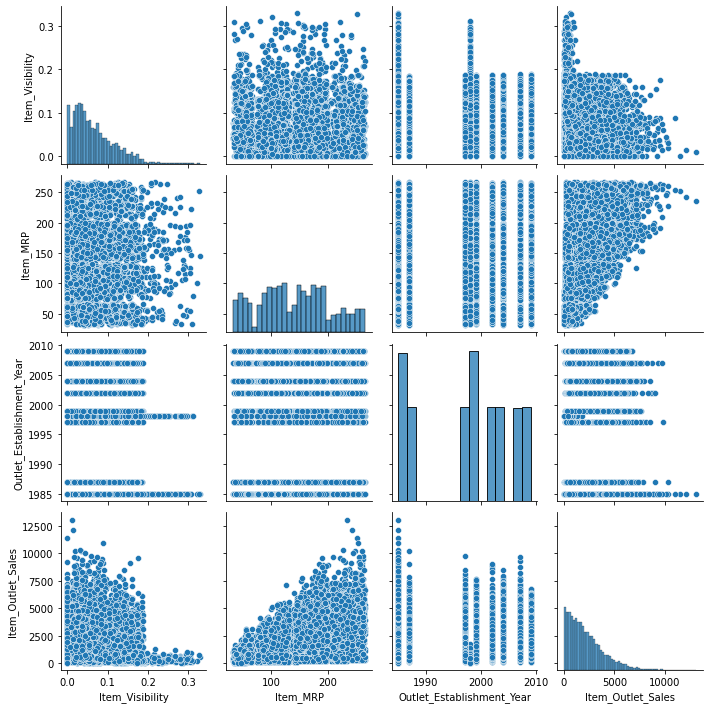

In [13]:
sns.pairplot(df.drop(columns= ['Item_Identifier', 'Outlet_Identifier']))

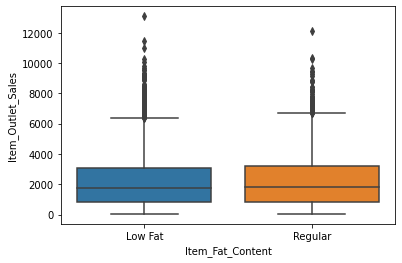

In [14]:
# Fat Content vs. Item Sales
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df);

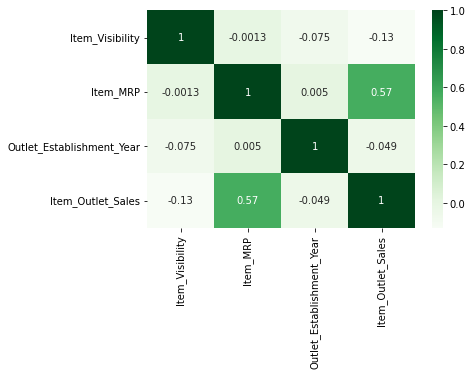

In [15]:
#heatmap
sns.heatmap(df.corr(), cmap='Greens', annot=True);

correlation is between item mrp and outlet item sales

# Visuals

In [16]:
len(df['Item_Type'].unique())

16

In [17]:
df_dairy = df.loc[df['Item_Type']=='Dairy']

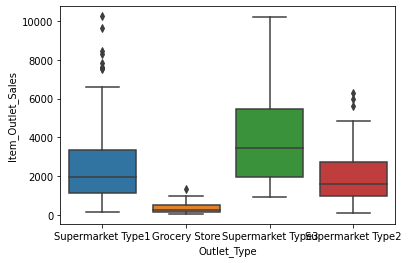

In [18]:
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df_dairy);

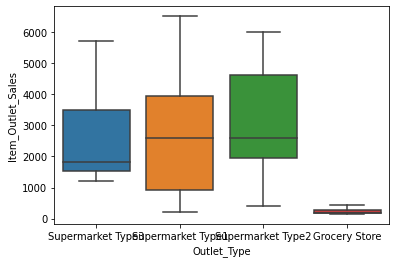

In [19]:
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df.loc[df['Item_Type']=='Seafood']);

# Preprocessing

In [20]:
# fix categories
df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular' }, inplace=True)

**Identify the data**
Item_Identifier: n/a
Item_weight: numerical
Item_Fat_content: nominal
Item_visibility: numerical
Item-type: nominal
Item_mrp: numerical
Outlet_identifier: n/a
Outlet_establishment_year: Nominal
Outlet_size: ordinal
Outlet_Location_type: ordinal

In [21]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [22]:
df['Outlet_Location_Type'].replace({'Tier 1':0, 'Tier 2': 1, 'Tier 3': 2}, inplace=True)
df['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [23]:
# Separate Data
y = df['Item_Outlet_Sales']
X = df.drop(columns=['Item_Identifier', 'Item_Outlet_Sales', 'Outlet_Identifier'])

In [24]:
# split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# make column selectors
cat_sel = make_column_selector(dtype_include='object')
num_sel = make_column_selector(dtype_include='number')

In [26]:
# instantiate imputers
med_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent')


In [27]:
# instantiate the ohe and the scaler
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()

In [28]:
# build pipelines
cat_pipe = make_pipeline(freq_imputer, ohe)
num_pipe = make_pipeline(med_imputer, scaler)

In [29]:
# build tuples
cat_tuple = (cat_pipe, cat_sel)
num_tuple = (num_pipe, num_sel)

In [30]:
pp_col_trans = make_column_transformer(cat_tuple, num_tuple, remainder='passthrough')
pp_col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f22479ea050>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f22479ea3d0>)])

In [31]:
pp_col_trans.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f22479ea050>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f22479ea3d0>)])

In [32]:
# Model Predictions
train_pred = pp_col_trans.transform(X_train)
test_pred = pp_col_trans.transform(X_test)

In [33]:
# instantiate the scaler
scaler = StandardScaler()

# Linear Regression Model to Predict Sales

In [34]:
# Importa nd instantiate the model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [35]:
# build pipelines
reg_pipe = make_pipeline(pp_col_trans, reg)


In [36]:
# Train the model on training data
reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f22479ea050>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f22479ea3d0>)])),
                ('linearregression', LinearRegression())])

In [37]:
# Make predictions using the testing data.
train_pred_lr = reg_pipe.predict(X_train)
test_pred_lr = reg_pipe.predict(X_test)

In [38]:
# import regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
# Evaluate the performance of model based on r^2.
train_r2_lr = r2_score(y_train, train_pred_lr)
test_r2_lr = r2_score(y_test, test_pred_lr)

print(f'Model Training R2: {train_r2_lr}')
print(f'Model Testing R2: {test_r2_lr}')

Model Training R2: 0.5598523281637309
Model Testing R2: 0.5663576599057694


In [41]:
# Evaluate the performance of model based on rmse.
train_RMSE_lr = np.sqrt(np.mean(y_train - train_pred_lr)**2)
test_RMSE_lr = np.sqrt(np.mean(y_test - test_pred_lr)**2)
print(f'Model Training RMSE: {train_RMSE_lr}')
print(f'Model Testing RMSE: {test_RMSE_lr}')

Model Training RMSE: 6.267529912390491
Model Testing RMSE: 11.883923416236513


# Regression Tree Model to Predict Sales

In [42]:
# Import Model
from sklearn.tree import DecisionTreeRegressor

In [43]:
# Make an instance of the Model
dec_tree = DecisionTreeRegressor(random_state= 42)


In [44]:
# Build Pipeline
dec_tree_pipe = make_pipeline(pp_col_trans, dec_tree)


In [45]:
 # Fit the model using training data.  
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f22479ea050>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f22479ea3d0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [46]:
# Predict the target values for the training set and the test set. 
train_preds_dt = dec_tree_pipe.predict(X_train)
test_preds_dt = dec_tree_pipe.predict(X_test)

In [52]:
# Evaluate the performance of model based on r^2.
dec_r2 = r2_score(y_train, train_preds_dt)
dec_r2 = r2_score(y_test, test_preds_dt)

print(f'Model Training R2: {dec_r2}')
print(f'Model Testing R2: {dec_r2}')


Model Training R2: 0.17378300577744143
Model Testing R2: 0.17378300577744143


In [49]:
# Evaluate the performance of model based on rmse.
train_RMSE_dt = np.sqrt(np.mean(y_train - train_preds_dt)**2)
test_RMSE_dt = np.sqrt(np.mean(y_test - test_preds_dt)**2)
print(f'Model Training RMSE: {train_RMSE_dt}')
print(f'Model Testing RMSE: {test_RMSE_dt}')

Model Training RMSE: 0.0
Model Testing RMSE: 22.27571215391836


# Tuning the Decision Tree Model

In [57]:
# Step 6: Tune the Model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [62]:
# What was the depth of our default tree?
dec_tree.get_depth()

41

In [59]:
# How many leaf nodes?
dec_tree.get_n_leaves()

6263

In [67]:
dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_pipe2 = make_pipeline(pp_col_trans, dec_tree)
dec_tree_pipe2.fit(X_train, y_train)
train_2_score = dec_tree_pipe2.score(X_train, y_train)
test_2_score = dec_tree_pipe2.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

1.0
0.17378300577744143


In [66]:
# set max depth to 20
dec_tree_20 = DecisionTreeRegressor(max_depth = 20, random_state = 42)
dec_tree_pipe20 = make_pipeline(pp_col_trans, dec_tree)
dec_tree_pipe20.fit(X_train, y_train)
train_20_score = dec_tree_pipe20.score(X_train, y_train)
test_20_score = dec_tree_pipe20.score(X_test, y_test)
print(train_20_score)
print(test_20_score)

1.0
0.17378300577744143


In [68]:
# List of values to try for max depth
max_depth_range= list(range(2, 40))
#loop for max depth range
r2= []
for depth in max_depth_range:
  dec_tree= DecisionTreeRegressor(max_depth= depth, random_state= 42)
  dec_tree_pipe = make_pipeline(pp_col_trans, dec_tree)
  dec_tree_pipe.fit(X_train, y_train)
  score= dec_tree_pipe.score(X_test, y_test)
  r2.append(score)

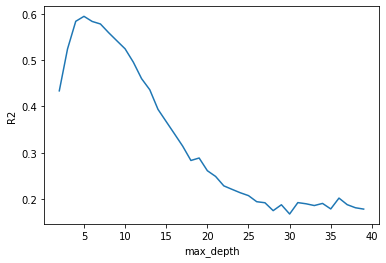

In [69]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt

plt.plot(max_depth_range,r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [70]:
dec_tree_7= DecisionTreeRegressor(max_depth = 7, random_state = 42)
dec_tree_pipe7 = make_pipeline(pp_col_trans, dec_tree)
dec_tree_pipe7.fit(X_train, y_train)
train_7_score = dec_tree_pipe7.score(X_train, y_train)
test_7_score = dec_tree_pipe7.score(X_test, y_test)
print(train_7_score)
print(test_7_score)

0.9999994988959452
0.17826449033223946


# Interpretation of Results

The linear regression model is the best model to utilize due to it having the better testing score. After evaluating the linear regression using the r^2 metrics there was a result of:
```
Model Training R2: 0.5598523281637309
Model Testing R2: 0.5663576599057694
```
Due to this I was able to determine that the linear regression was the best model to use. Even after tuning the decision tree model I was unable to get scores that were good enough to consider the tree model of the linear regression model.


